In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import sqlite3
import datetime as dt

### Connect to the Hawaii Database

In [3]:
#connect
conn = sqlite3.connect("Resources/hawaii.sqlite")

In [4]:
#obtain a cursor - something to loop through via database connection
cur = conn.cursor()

In [5]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
#obtain data from cursor via loop - in this case - table names in database file
rows = cur.fetchall()
 
for row in rows:
    print(row)

('measurement',)
('station',)


In [6]:
#obtain details of the schema/table format from table named measurement
cur.execute("SELECT sql FROM sqlite_master WHERE name='measurement'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [7]:
#obtain details of the schema/table format from table named station
cur.execute("SELECT sql FROM sqlite_master WHERE name='station'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [8]:
#view
cur.execute("SELECT * from measurement limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [9]:
#view
cur.execute("SELECT * from station limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [10]:
#view total records
cur.execute("SELECT count(*) from station")
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#  measurement has 19,500 records
# station has 9 records

(9,)


### Begin Precipitation Analysis

In [11]:
#find the latest date in measurement

cur.execute("SELECT max(date) from measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#returns 2017-08-23

('2017-08-23',)


In [ ]:
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.

#NOTE:    last date in measurement is 2017-08-23
#use this if the data were current:
# cur.execute("SELECT * from measurement where date >= date( julianday(date('now'))-365);")

cur.execute("SELECT date, prcp from measurement where date >= '2016-08-24'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

In [13]:
#Load the query results into a Pandas DataFrame (do this later:  set the index to the date column.)

lastYear = pd.read_sql("SELECT date, prcp from measurement where date >= '2016-08-24'", conn)

In [14]:
lastYear.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


In [15]:
#Sort the DataFrame values by date.   Sort ascending first by date, then by prcp
lastYear = lastYear.sort_values(['date', 'prcp'], ascending=[True,True])

In [16]:
lastYear.head()

,date,prcp
0,2016-08-24,0.08
1188,2016-08-24,1.22
1875,2016-08-24,1.45
360,2016-08-24,2.15
1524,2016-08-24,2.15


In [17]:
#Make the date the index column
lastYear2 = lastYear.set_index('date')

In [18]:
#manual check
lastYear2.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,1.45
2016-08-24,2.15
2016-08-24,2.15


Text(0, 0.5, 'Precipitation (inches)')

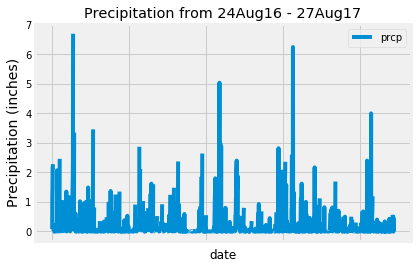

In [19]:
#Plot the results using the DataFrame plot method.
lastYear2.plot()
plt.title("Precipitation from 24Aug16 - 27Aug17")
plt.ylabel('Precipitation (inches)', fontsize=14)

In [20]:
#Use Pandas to print the summary statistics for the precipitation data.

# Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [23]:
# Design a query to show how many stations are available in this dataset?


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
